In [1]:
import pandas as pd
from management.inventory import InventoryManagement
from management.inventory import HistoricalPlotter

Initial all the data file and create an InventoryManagement instance

In [2]:
def clear_csv_file(file_path):
    # Read the CSV file, keeping only the column names
    df = pd.read_csv(file_path, nrows=0)
    # Overwrite the file, writing only the column names
    df.to_csv(file_path, index=False)


clear_csv_file("inventory.csv")
clear_csv_file("remaining_productivity.csv")
clear_csv_file("extra_productivity.csv")

inventory_file = "inventory.csv"
remaining_productivity_file = "remaining_productivity.csv"
extra_productivity_file = "extra_productivity.csv"
plantation_file = "plantations.csv"
fruit_file = "fruits.csv"

inventory_manager = InventoryManagement(extra_productivity_file, remaining_productivity_file, inventory_file, plantation_file, fruit_file)


Initialize the data in remaining_productivity.csv by estimate production in all varieties and show the result.

In [3]:
inventory_manager.total_product_estimate()
inventory_manager.get_remaining_productivity()

   index  Ambrosia  Gala  Honeycrisp  Lapins  Sweetheart  Skeena  Redhaven  \
0      1     30000     0           0   40000           0       0         0   

   Elberta  Cresthaven  
0    54000           0  


,index,Ambrosia,Gala,Honeycrisp,Lapins,Sweetheart,Skeena,Redhaven,Elberta,Cresthaven
0,1,30000,0,0,40000,0,0,0,54000,0


Add some fruits into inventory

In [4]:
inventory_manager.add_inventory('Ambrosia', 300)
inventory_manager.add_inventory('Elberta', 400)
inventory_manager.add_inventory('Lapins', 500)
inventory_manager.get_current_inventory()

  index Ambrosia Gala Honeycrisp Lapins Sweetheart Skeena Redhaven Elberta  \
2     3      300    0          0    500          0      0        0     400   

  Cresthaven  
2          0  


,index,Ambrosia,Gala,Honeycrisp,Lapins,Sweetheart,Skeena,Redhaven,Elberta,Cresthaven
2,3,300,0,0,500,0,0,0,400,0


Remove inventory of some fruits

In [5]:
inventory_manager.remove_inventory('Ambrosia', 50)
inventory_manager.remove_inventory('Elberta', 100)
inventory_manager.get_current_inventory()

  index Ambrosia Gala Honeycrisp Lapins Sweetheart Skeena Redhaven Elberta  \
2     3      300    0          0    500          0      0        0     400   

  Cresthaven  
2          0  


,index,Ambrosia,Gala,Honeycrisp,Lapins,Sweetheart,Skeena,Redhaven,Elberta,Cresthaven
2,3,300,0,0,500,0,0,0,400,0


When the production is **more than estimated capacity** save it in extra_productivity in the same time

In [6]:
inventory_manager.add_inventory("Honeycrisp", 300)
inventory_manager.add_inventory("Gala", 300)
inventory_manager.get_current_inventory()
inventory_manager.get_extra_productivity()

The product of Honeycrisp exceeds expectations and will be recorded in the extra_productivity file.
The product of Gala exceeds expectations and will be recorded in the extra_productivity file.
  index Ambrosia Gala Honeycrisp Lapins Sweetheart Skeena Redhaven Elberta  \
4     5      300  300        300    500          0      0        0     400   

  Cresthaven  
4          0  
  index Ambrosia Gala Honeycrisp Lapins Sweetheart Skeena Redhaven Elberta  \
3     6      300  300        300    500          0      0        0     300   

  Cresthaven  
3          0  


,index,Ambrosia,Gala,Honeycrisp,Lapins,Sweetheart,Skeena,Redhaven,Elberta,Cresthaven
3,6,300,300,300,500,0,0,0,300,0


Show inventory in plot

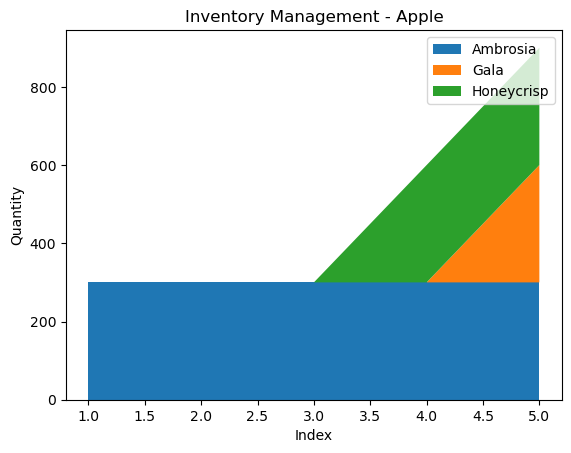

In [7]:
plotter = HistoricalPlotter(remaining_productivity_file, inventory_file)
plotter.plot_historical_data(1, 1)